In [ ]:
# Import our libraries

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Helper function to split our data
from sklearn.model_selection import train_test_split

# This is our Logit model
from sklearn.linear_model import LogisticRegression

# Helper fuctions to evaluate our model.
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    classification_report,
    f1_score,
)


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

## ChatGPTs Version of this code... 
Who can spot the little huge mistake....

Optimization terminated successfully.
         Current function value: 0.443097
         Iterations 7
Accuracy Score: 0.763636
F1 Score: 0.786885
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  128
Model:                          Logit   Df Residuals:                      125
Method:                           MLE   Df Model:                            2
Date:                Fri, 17 Oct 2025   Pseudo R-squ.:                  0.2866
Time:                        03:41:08   Log-Likelihood:                -56.716
converged:                       True   LL-Null:                       -79.499
Covariance Type:            nonrobust   LLR p-value:                 1.275e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2875      0.758      4.339      0.000       1.8

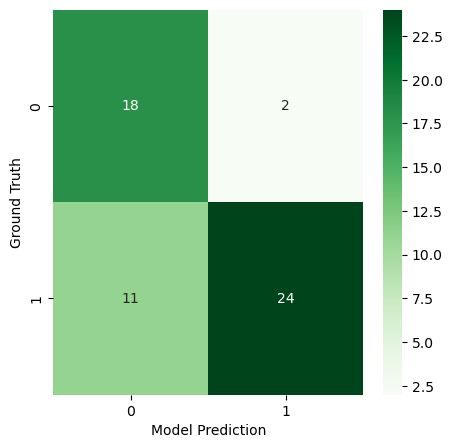

In [ ]:
# Load and Inspect
df = pd.read_csv("data/titanic.csv")

# Inspect, we did this in the previous lecture file.

# Select and Engineer.
features = ["age", "sex_male"]
target = "survived"

# Drop rows with missing target or missing important features
df.dropna(inplace=True)

# Convert categorical variables to dummy variables (one-hot encoding)
df = pd.get_dummies(df, columns=["sex", "pclass"], dtype=int, drop_first=True)

# Define Features and Target
X = df[features]
y = df[target]


# Split the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# # Adding a constant term for intercept
X_train_sm = sm.add_constant(X_train)


# Fit the Logistic Regression Model using Statsmodels
logit_model = sm.Logit(endog=y_train, exog=X_train_sm)
result = logit_model.fit()

# Make Predictions on the Test Set
X_test_sm = sm.add_constant(X_test)  # Adding constant to test data
y_pred_prob = result.predict(X_test_sm)  # Predicting probabilities
y_pred = np.where(
    y_pred_prob > 0.5, 1, 0
)  # Convert probabilities to binary predictions (using 0.5 as threshold)

######################################
##################### EVALUATE

# ACCURACY
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: %f" % accuracy)

# F1 ACCURACY
f1 = f1_score(y_test, y_pred)
print("F1 Score: %f" % f1)


# CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(5, 5))
ax = sns.heatmap(cm, annot=True, cmap="Greens", fmt="g")
plt.ylabel("Ground Truth")
plt.xlabel("Model Prediction")


# Add to our dataframe to interprept
X_test_sm["y_pred_proba"] = y_pred_prob
X_test_sm["y_pred"] = y_pred

# Print the summary of the model
print(result.summary())

print(classification_report(y_pred, y_test))